# Predicting Car Prices with KNNRegressor
**Exploring Basic ML techniques for learning purposes** 
![predict_car2](predict_car1.png)

## Introdution:
In this project, We'll practice the some a basic machine learning workflow we've learned so far to predict a car's market price using its attributes.

## DataSet

The data set we will be working with contains information on various cars. For each car we have information about the technical aspects of the vehicle.

This data set consists of three types of entities: 

1. The specification of an auto in terms of various characteristics

2. Its assigned insurance risk rating, 

3. Its normalized losses in use as compared to other cars. 

The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process *symboling*. A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year.

Note: Several of the attributes in the database could be used as a "class" attribute.

### Data Dictionary
|Attribute|Description|
|:--------|:----------|
|symboling| -3, -2, -1, 0, 1, 2, 3|
|normalized-losses| continuous from 65 to 256|
|make|alfa-romero, audi, bmw, chevrolet, dodge, honda,isuzu, jaguar, mazda, mercedes-benz, mercury,mitsubishi, nissan, peugot,plymouth, porsche,renault, saab, subaru, toyota, volkswagen, volvo
|fuel-type| diesel, gas|
|aspiration| std, turbo|
|num-of-doors| four, two|
|body-style| hardtop, wagon, sedan, hatchback, convertible|
|drive-wheels| 4wd, fwd, rwd|
|engine-location| front, rear|
|wheel-base| continuous from 86.6 120.9|
|length| continuous from 141.1 to 208.1|
|width| continuous from 60.3 to 72.3|
|height| continuous from 47.8 to 59.8|
|curb-weight| continuous from 1488 to 4066|
|engine-type| dohc, dohcv, l, ohc, ohcf, ohcv, rotor|
|num-of-cylinders| eight, five, four, six, three, twelve, two|
|engine-size| continuous from 61 to 326|
|fuel-system| 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi|
|bore| continuous from 2.54 to 3.94|
|stroke| continuous from 2.07 to 4.17|
|compression-ratio| continuous from 7 to 23|
|horsepower| continuous from 48 to 288|
|peak-rpm| continuous from 4150 to 6600|
|city-mpg| continuous from 13 to 49|
|highway-mpg| continuous from 16 to 54|
|🎯 price| continuous from 5118 to 45400|


### Resources:
The dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/automobile)

## Goal:
Predict Car's market price using its attributes (using KNN Rergressor())

---

In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, KFold

In [2]:
# Display Options
pd.options.display.max_columns = 50

In [3]:
# Import dataset
cars = pd.read_csv('imports-85.data')

---

## Data Exploration and Cleaning

In [4]:
cars.shape

(204, 26)

In [5]:
cars.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [6]:
cars.columns

Index(['3', '?', 'alfa-romero', 'gas', 'std', 'two', 'convertible', 'rwd',
       'front', '88.60', '168.80', '64.10', '48.80', '2548', 'dohc', 'four',
       '130', 'mpfi', '3.47', '2.68', '9.00', '111', '5000', '21', '27',
       '13495'],
      dtype='object')

- We can observe that columns do not have names as they are in the dataset documentation.

Lets rename them according to the Data Documentation

In [7]:
cols = ['symboling', 'normalized-losses', 'make', 
        'fuel-type', 'aspiration', 'num-of-doors', 
        'body-style', 'drive-wheels', 'engine-location',
        'wheel-base', 'length', 'width', 'height', 
        'curb-weight', 'engine-type', 'num-of-cylinders',
        'engine-size', 'fuel-system', 'bore', 'stroke', 
        'compression-rate', 'horsepower', 'peak-rpm', 
        'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv('imports-85.data', names=cols)

cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [8]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

- Apparently there are no null values found. **But** on running value_counts, we can witness that certainly there are some Null Values misrepresented as **?**

In [9]:
cars = cars.replace('?', np.nan)

In [10]:
# Recompute 
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

- `normalized-losses` is 20% Null Values
- Columns such as our target, `price` alongwith `peak-rpm`, `horsepower`, `bore`, `stroke`, `num-of-doors` also consist of Null Values. However they are quite rare, therefore, can be handled easily

We are dropping the samples where the target `Price` is NaN

In [11]:
cars = cars.dropna(subset=['price'])

In [12]:
# Currently, following features are in numerical Dtypes
cars.select_dtypes(include=['integer', 'float']).head(3)

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-rate,city-mpg,highway-mpg
0,3,88.6,168.8,64.1,48.8,2548,130,9.0,21,27
1,3,88.6,168.8,64.1,48.8,2548,130,9.0,21,27
2,1,94.5,171.2,65.5,52.4,2823,152,9.0,19,26


In [13]:
# Currently, following features are in Object Dtypes
cars.select_dtypes(exclude=['integer', 'float']).head(3)

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,bore,stroke,horsepower,peak-rpm,price
0,NaN,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,3.47,2.68,111,5000,13495
1,NaN,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,3.47,2.68,111,5000,16500
2,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,2.68,3.47,154,5000,16500


- For the columns that are **currently** in object Dtypes, many of them could do better being numerical or were actually numerical on the first place. There inclusion in Object Dtypes could be due to
    - Misrepresentation of Null Values
    - Input of values in words rather than numbers ('four' for 4)
- We can also consider performing Ordinal Encoding for the columns that have a potential to be represented as Categorical columns with low Cardinality

Lets get deeper into the Variables w.r.t to their Dtypes and check their Cardinality

In [14]:
# A Series of Dtypes of columns. Due to some error, making a Series came handier than listing it
d_ser = pd.Series(cars.dtypes)

names = []
current_dtypes = []
n_nulls = []
n_uniques = []
some_unique_vals = []

for col in cars.columns:
    # Col name
    name = col
    names.append(col)
    
    # Null Vals in col
    n_null = cars[col].isnull().sum()
    n_nulls.append(n_null)
    
    # Num of Unique vals in cols
    n_unique = cars[col].nunique()
    n_uniques.append(n_unique)
    
    # Some unique vals, themselves
    some_unique_val = cars[col].unique()[:7]
    some_unique_vals.append(list(some_unique_val))
    
lists_insights = [names, n_nulls, n_uniques, some_unique_vals]

# for Dtypes 
dtype_ser = pd.Series(cars.dtypes)

    
df_info = pd.DataFrame(lists_insights)
df_info = df_info.T

# Rename Colums
df_info.rename(columns={0:'Column Name', 1:'Null Values', 2:'Cardinality', 3:'Some of the Unique Values as examples'}, 
                   inplace=True)

# Concat Dtypes information and Other
df_insights = pd.concat([df_info.set_index('Column Name'), d_ser.to_frame()], axis=1)
df_insights.rename(columns={0: 'Dtype Current'}, inplace=True)
df_insights

,Null Values,Cardinality,Some of the Unique Values as examples,Dtype Current
Column Name,,,,
symboling,0,6,"[3, 1, 2, 0, -1, -2]",int64
normalized-losses,37,51,"[nan, 164, 158, 192, 188, 121, 98]",object
make,0,22,"[alfa-romero, audi, bmw, chevrolet, dodge, hon...",object
fuel-type,0,2,"[gas, diesel]",object
aspiration,0,2,"[std, turbo]",object
num-of-doors,2,2,"[two, four, nan]",object
body-style,0,5,"[convertible, hatchback, sedan, wagon, hardtop]",object
drive-wheels,0,3,"[rwd, fwd, 4wd]",object
engine-location,0,2,"[front, rear]",object


- Following Columns can be taken as nominal columns and dealt with One-Hot-Enconding
    - `fuel-system`, `engine-type`, `engine-location`, `drive-wheels`, `body-style`, `aspiration`, `fuel-type`, `make`
    

- `num-of-cylinders` and , `num-of-doors` should be improved by changing their the numbers represented in words to numerics, e.g: ('seven' to 7)

Lets look at `num-of-cylinders` and  `num-of-doors` for now and change their formatting and dtype back to integer


In [15]:
# See unique vals
print(cars['num-of-cylinders'].unique())

# Map and Change Dtype
cars['num-of-cylinders'] = cars['num-of-cylinders'].map({'four':4, 'six':6, 'five':5, 'three':3, 
                                                         'twelve': 12, 'two': 2, 'eight': 8}).astype(int)



['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']


In [16]:
# See unique vals
print(cars['num-of-doors'].unique())

# Map ONLY
cars['num-of-doors'] = cars['num-of-doors'].map({'four':4, 'two':2}, na_action='ignore')

['two' 'four' nan]


- The function `astype()` could not work on `num-of-doors`  due to the presence of NaNs

In [17]:
cars.describe()

,symboling,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,compression-rate,city-mpg,highway-mpg
count,201.000000,199.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,3.135678,98.797015,174.200995,65.889055,53.766667,2555.666667,4.363184,126.875622,10.164279,25.179104,30.686567
std,1.254802,0.993252,6.066366,12.322175,2.101471,2.447822,517.296727,1.059452,41.546834,4.004965,6.423220,6.815150
min,-2.000000,2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,2.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,2.000000,94.500000,166.800000,64.100000,52.000000,2169.000000,4.000000,98.000000,8.600000,19.000000,25.000000
50%,1.000000,4.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,4.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,4.000000,102.400000,183.500000,66.600000,55.500000,2926.000000,4.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,4.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,12.000000,326.000000,23.000000,49.000000,54.000000


In [18]:
# We can see that we are missing 'price' as a numerical variable
cars['price'] = cars['price'].astype(int)

Now, Lets get back to focusing the **Null Values** found in the dataset

In [19]:
# For cols that are CURRENTLY in numerical Dtypes
cars.select_dtypes(include=['integer', 'float']).isnull().sum()

symboling           0
num-of-doors        2
wheel-base          0
length              0
width               0
height              0
curb-weight         0
num-of-cylinders    0
engine-size         0
compression-rate    0
city-mpg            0
highway-mpg         0
price               0
dtype: int64

- No null values found in the columns that are of numerical dtypes **for now**

In [20]:
# For cols that are CURRENTLY in object Dtypes
cars.select_dtypes(exclude=['integer', 'float']).isnull().sum()

normalized-losses    37
make                  0
fuel-type             0
aspiration            0
body-style            0
drive-wheels          0
engine-location       0
engine-type           0
fuel-system           0
bore                  4
stroke                4
horsepower            2
peak-rpm              2
dtype: int64

- `normalized-losses` contains comparatively a large number of Null Values. With such a small dataset, removing those rows would mean further reducing our dataset by 25%
- Lets take a leap of faith and impute the Null values of `normalizd-losses` and all other Numerical Columns with **mean** and impute the Categorical columns with **Mode/Median**

In [21]:
# Impute following column with mode
cars['num-of-doors'] = cars['num-of-doors'].fillna(cars['num-of-doors'].median())
cars['num-of-doors'].value_counts(dropna=False)

4.0    115
2.0     86
Name: num-of-doors, dtype: int64

In [22]:
# Impute following columns with mean
for col in ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm']:
    cars[col] = cars[col].fillna(cars[col].astype(float).mean())


### Normalization of Data 
Except for the **target variable**, `price` and categorical columns, lets normalize all the columns
![norm](norm.png)

So lets begin with some data preparation

In [23]:
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,2.0,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,4.0,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,4.0,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [24]:
# Lets isolate these columns (Categorical columns and Target)to keep them back from Normalization 
num_df = cars[['normalized-losses','wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 
            'bore', 'stroke', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'compression-rate']] 
            # Symboling is more of an ordinal variable
price_df = cars['price']

# Drop the columns
cars = cars.drop(['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 
            'bore', 'stroke', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'compression-rate', 'price'], axis=1)

In [25]:
num_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized-losses  201 non-null    object 
 1   wheel-base         201 non-null    float64
 2   length             201 non-null    float64
 3   width              201 non-null    float64
 4   height             201 non-null    float64
 5   curb-weight        201 non-null    int64  
 6   engine-size        201 non-null    int64  
 7   bore               201 non-null    object 
 8   stroke             201 non-null    object 
 9   horsepower         201 non-null    object 
 10  peak-rpm           201 non-null    object 
 11  city-mpg           201 non-null    int64  
 12  highway-mpg        201 non-null    int64  
 13  compression-rate   201 non-null    float64
dtypes: float64(5), int64(4), object(5)
memory usage: 23.6+ KB


In [26]:
# Conversion to floats
num_df = num_df.astype(float)

In [27]:
# Normalize the data
num_df = (num_df - num_df.min()) / (num_df.max() - num_df.min())

In [28]:
# Fix the target back, without having being normalized 
#num_cars['price'] = price_col

In [29]:
cars

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,3,alfa-romero,gas,std,2.0,convertible,rwd,front,dohc,4,mpfi
1,3,alfa-romero,gas,std,2.0,convertible,rwd,front,dohc,4,mpfi
2,1,alfa-romero,gas,std,2.0,hatchback,rwd,front,ohcv,6,mpfi
3,2,audi,gas,std,4.0,sedan,fwd,front,ohc,4,mpfi
4,2,audi,gas,std,4.0,sedan,4wd,front,ohc,5,mpfi
...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo,gas,std,4.0,sedan,rwd,front,ohc,4,mpfi
201,-1,volvo,gas,turbo,4.0,sedan,rwd,front,ohc,4,mpfi
202,-1,volvo,gas,std,4.0,sedan,rwd,front,ohcv,6,mpfi
203,-1,volvo,diesel,turbo,4.0,sedan,rwd,front,ohc,6,idi


In [30]:
nominal_cols = ['make', 'fuel-type', 'aspiration', 'body-style', 'drive-wheels', 
                'engine-location', 'fuel-system', 'engine-type']
# Lets assign dummies to the nominal variables and drop a column of each set to avoid MultiColinearity
cat_df = pd.get_dummies(data=cars, columns=nominal_cols, drop_first=True)

cat_df.head()

,symboling,num-of-doors,num-of-cylinders,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,fuel-type_gas,aspiration_turbo,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_fwd,drive-wheels_rwd,engine-location_rear,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor
0,3,2.0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
1,3,2.0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
2,1,2.0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
3,2,4.0,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,2,4.0,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0


In [31]:
# Combining all dataframe pieces
df = pd.concat([num_df, cat_df, price_df], axis=1)
df.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,horsepower,peak-rpm,city-mpg,highway-mpg,compression-rate,symboling,num-of-doors,num-of-cylinders,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,...,make_toyota,make_volkswagen,make_volvo,fuel-type_gas,aspiration_turbo,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_fwd,drive-wheels_rwd,engine-location_rear,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.294393,0.346939,0.222222,0.289474,0.1250,3,2.0,4,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,13495
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.294393,0.346939,0.222222,0.289474,0.1250,3,2.0,4,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,16500
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.495327,0.346939,0.166667,0.263158,0.1250,1,2.0,6,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,16500
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.252336,0.551020,0.305556,0.368421,0.1875,2,4.0,4,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,13950
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.313084,0.551020,0.138889,0.157895,0.0625,2,4.0,5,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,17450


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 60 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   normalized-losses     201 non-null    float64
 1   wheel-base            201 non-null    float64
 2   length                201 non-null    float64
 3   width                 201 non-null    float64
 4   height                201 non-null    float64
 5   curb-weight           201 non-null    float64
 6   engine-size           201 non-null    float64
 7   bore                  201 non-null    float64
 8   stroke                201 non-null    float64
 9   horsepower            201 non-null    float64
 10  peak-rpm              201 non-null    float64
 11  city-mpg              201 non-null    float64
 12  highway-mpg           201 non-null    float64
 13  compression-rate      201 non-null    float64
 14  symboling             201 non-null    int64  
 15  num-of-doors          2

---

##  Univariate k-nearest neighbors models. 
Starting with simple models before moving to more complex models helps us structure code workflow and understand the features better.

Lets make a simple function to structure the workflow

In [33]:
def knn_train_test(df, train_col_name, target_col_name):
    '''
    The function encapsulates the training and 
    simple validation process. It assumes 
    default value of k=5
    
    Args:
        train_col_name: Train's Column name
        target_col_name: Target Column name
        df : DataFrame
    Returns:
        RMSE of the column
    '''
   
    # Intantiate model
    knn = KNeighborsRegressor()
    np.random.seed(1)
    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    # Divide the dataframe into two partitions
    half = int(rand_df.shape[0] / 2)
    
    # One for train other for test
    train_df = rand_df.iloc[0:half]
    test_df = rand_df.iloc[half:]
    
    # Fit a KNN model to train_df (features and target)
    knn.fit(train_df[[train_col_name]], train_df[target_col_name])
    
    
    # Predict on test
    prediction = knn.predict(test_df[[train_col_name]])
    
    # Calculate and return RMSE
    mse = mean_squared_error(test_df[target_col_name], prediction)
    rmse = np.sqrt(mse)
    return rmse

#### Lets try training and testing univariate models

In [34]:
# Dictionary to store our results
dict_rmse_uni = {}

In [35]:
# From columns names of 'num_cars', lets drop target variable 'price' name
train_cols = df.columns.drop('price')
train_cols

Index(['normalized-losses', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'engine-size', 'bore', 'stroke', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg', 'compression-rate', 'symboling',
       'num-of-doors', 'num-of-cylinders', 'make_audi', 'make_bmw',
       'make_chevrolet', 'make_dodge', 'make_honda', 'make_isuzu',
       'make_jaguar', 'make_mazda', 'make_mercedes-benz', 'make_mercury',
       'make_mitsubishi', 'make_nissan', 'make_peugot', 'make_plymouth',
       'make_porsche', 'make_renault', 'make_saab', 'make_subaru',
       'make_toyota', 'make_volkswagen', 'make_volvo', 'fuel-type_gas',
       'aspiration_turbo', 'body-style_hardtop', 'body-style_hatchback',
       'body-style_sedan', 'body-style_wagon', 'drive-wheels_fwd',
       'drive-wheels_rwd', 'engine-location_rear', 'fuel-system_2bbl',
       'fuel-system_4bbl', 'fuel-system_idi', 'fuel-system_mfi',
       'fuel-system_mpfi', 'fuel-system_spdi', 'fuel-system_spfi',
       'engine-ty

In [36]:
# Iterate in train_cols, and train each of the columns with target, 'price'
for each_col in train_cols:
    rmse_val = knn_train_test(df, each_col, 'price')
    dict_rmse_uni[each_col] = rmse_val # Append the result of each to the dictionary

In [37]:
# Convert into a Series
ser_rmse_uni = pd.Series(dict_rmse_uni).sort_values()
ser_rmse_uni.head(15) # Just showing the top 15

engine-size           3238.462830
horsepower            4037.037713
curb-weight           4401.118255
highway-mpg           4630.026799
width                 4704.482590
city-mpg              4766.422505
num-of-cylinders      5417.206767
length                5427.200961
wheel-base            5461.553998
drive-wheels_rwd      6554.872172
compression-rate      6610.812153
bore                  6780.627785
make_mercedes-benz    6872.338722
drive-wheels_fwd      7025.166546
fuel-system_2bbl      7147.216435
dtype: float64

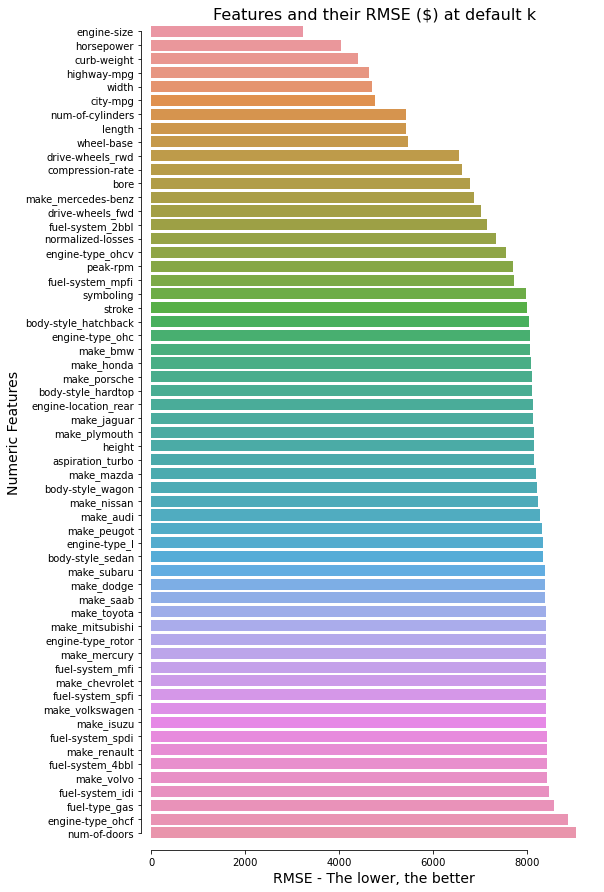

In [38]:
plt.figure(figsize=(8,15))
sns.barplot(x=ser_rmse_uni, y=ser_rmse_uni.index)

# Settings
plt.xlabel('RMSE - The lower, the better', fontsize=14)
plt.ylabel('Numeric Features', fontsize=14)
plt.title('Features and their RMSE ($) at default k', fontsize=16)

# Aesthetics
sns.despine(offset=10, trim=True)


- From the results with default value of k, we can see that 
    - `engine size` has the lowest RMSE with target variable `price`
    - `horse-power` and `curb-weight` are also among the variables with the least RMSE

 Lets modify the function to accept **a parameter for the k value**. 
 *K by default is set as 5. This means it will take the 5 nearest points to the target into consideration*
 
 For each numeric column, create, train, and test a univariate model using the following k values (1, 3, 5, 7, and 9)


In [39]:
def knn_train_test(df, train_col_name, target_col_name):
    '''
    The function encapsulates the training and 
    simple validation process. It takes multiple
    parameters for k.
    
    Args:
        train_col_name: Train's Column name
        target_col_name: Target Column name
        df : DataFrame
    Returns:
        RMSE of the column
    '''
    
    np.random.seed(1)
    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    # Divide the dataframe into two partitions
    half = int(rand_df.shape[0] / 2)
    
    # One for train other for test
    train_df = rand_df.iloc[0:half]
    test_df = rand_df.iloc[half:]
    
    # K values 
    k = [1, 3, 5, 7, 9]
    
    # Dictionary to store results
    k_rmse = {}
    
    for k_val in k:
        knn = KNeighborsRegressor(n_neighbors=k_val)
        # Fit a KNN model to train_df (features and target)
        knn.fit(train_df[[train_col_name]], train_df[target_col_name])

        # Predict 
        prediction = knn.predict(test_df[[train_col_name]])

        # Calculate and return RMSE
        mse = mean_squared_error(test_df[target_col_name], prediction)
        rmse = np.sqrt(mse)
        k_rmse[k_val] = rmse
    return k_rmse

In [40]:
dict_k_rmse_uni = {}
for each_col in train_cols:
    rmse_val = knn_train_test(df, each_col, 'price')
    dict_k_rmse_uni[each_col] = rmse_val
report_1 = pd.DataFrame(dict_k_rmse_uni).T

# Lets intoduce a temporary column that calculates mean of every feature
report_1['mean_to_sort'] = report_1.apply(lambda x: x.mean(), axis=1)
report_1.sort_values(by='mean_to_sort', inplace=True)

# And drop it
report_1.drop('mean_to_sort', axis=1)

,1,3,5,7,9
engine-size,3258.486106,2840.562806,3238.462830,3563.086774,3831.824415
horsepower,4170.054848,4020.849263,4037.037713,4353.811860,4515.135617
width,4559.257298,4606.413692,4704.482590,4571.485046,4652.914172
curb-weight,5264.290231,5022.318012,4401.118255,4330.608104,4632.044474
highway-mpg,6025.594967,4617.305020,4630.026799,4796.061440,5278.358057
length,4628.455501,5129.835821,5427.200961,5313.427721,5383.054515
city-mpg,5901.143574,4646.746409,4766.422505,5232.523034,5465.209493
wheel-base,4493.734069,5120.161506,5461.553998,5448.107051,5738.405685
num-of-cylinders,5589.021324,5404.326878,5417.206767,5778.610150,5974.405014
drive-wheels_rwd,6568.165784,6498.678606,6554.872172,6419.613184,6469.723551


Attributes that  produced the lowest of the RMSEs are `engine-size`, `horsepower`, `width`, `curb-weight`, `highway-mpg`, `lenght`, `city-mpg`, `wheel-base`, and `num-of-cylinders`

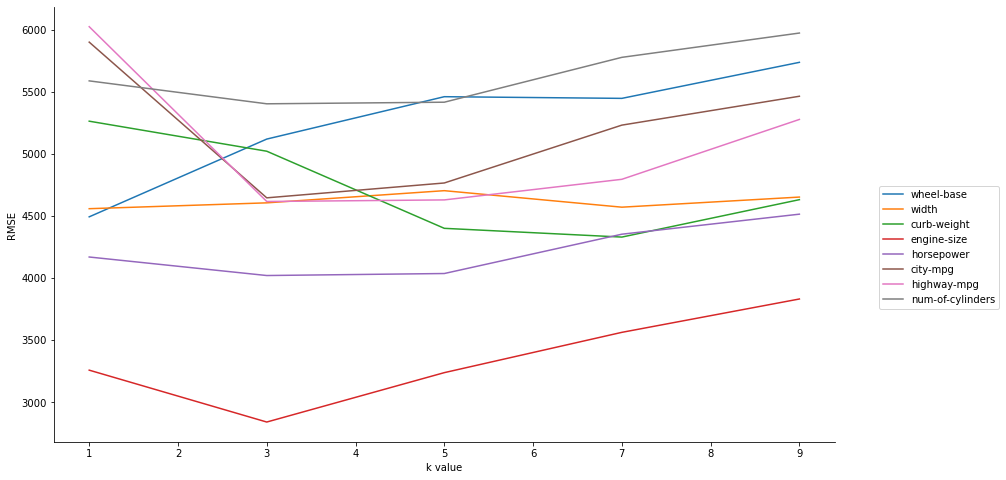

In [41]:
# List of column names with the Lowest RMSE
list_lowest_rmse_uni = ['engine-size', 'horsepower', 'width', 'curb-weight', 'highway-mpg', 
                        'lenght', 'city-mpg', 'wheel-base','num-of-cylinders']

# Dict of column names and RMSE with multiple K vals with the Lowest RMSE
dict_lowest_rmse_uni = {}
for k, v in dict_k_rmse_uni.items():
    if k in list_lowest_rmse_uni:
        dict_lowest_rmse_uni[k] = v
        
# Plot
fig = plt.figure(figsize=(14,8))
for k,v in dict_lowest_rmse_uni.items():
    x = list(v.keys())
    y = list(v.values())
    sns.lineplot(x=x,y=y, label="{}".format(k))
    plt.xlabel('k value')
    plt.ylabel('RMSE')
plt.legend(bbox_to_anchor = (1.05, 0.6))
sns.despine()

- Among these 8 variables, `engine-size` produced the lowest RMSE at k value of 3. 
- `highway-mpg` and `city-mpg` also appear to have their dips on k=3

Let's now increase the number of attributes we use to make our predictions. 



<font color='red'> Following statement is not clear, after the word 'similar'. check from vid or other projects
    
    
<font color='black'>For example,  do we get less a smaller margin of error if we look at the cars with the most similar `engine size`, `horsepower`, `highway-mpg` etc rather than just one of these attributes.

---

###  Multivariate k-nearest neighbors models. 
Let's modify the knn_train_test() function we wrote in the last step to work with multiple columns.

In [42]:
# Compute average RMSE across different `k` values for each feature.
features_avg_rmse = {}

for k,v in dict_k_rmse_uni.items():
    avg_rmse = np.mean(list(v.values()))
    features_avg_rmse[k] = avg_rmse
    
ser_avg_rmse = pd.Series(features_avg_rmse)
sorted_ser_avg_rmse = ser_avg_rmse.sort_values()
print(sorted_ser_avg_rmse)

engine-size             3346.484586
horsepower              4219.377860
width                   4618.910560
curb-weight             4730.075815
highway-mpg             5069.469256
length                  5176.394904
city-mpg                5202.409003
wheel-base              5252.392462
num-of-cylinders        5632.714027
drive-wheels_rwd        6502.210659
drive-wheels_fwd        7049.224187
compression-rate        7166.073599
bore                    7222.472445
fuel-system_2bbl        7442.704219
engine-type_ohcv        7556.420851
fuel-system_mpfi        7603.592183
normalized-losses       7624.407151
make_mercedes-benz      7935.228675
engine-type_ohc         7985.859763
stroke                  8000.240467
peak-rpm                8119.365233
height                  8163.346266
symboling               8167.734209
body-style_hatchback    8272.925121
make_toyota             8662.308465
body-style_sedan        8751.708975
make_honda              8809.430865
make_bmw                8840

In [43]:
# Lets drag the index out from 'sorted_ser_avg_rmse' for iteration purposes
sorted_features = sorted_ser_avg_rmse.index
sorted_features

Index(['engine-size', 'horsepower', 'width', 'curb-weight', 'highway-mpg',
       'length', 'city-mpg', 'wheel-base', 'num-of-cylinders',
       'drive-wheels_rwd', 'drive-wheels_fwd', 'compression-rate', 'bore',
       'fuel-system_2bbl', 'engine-type_ohcv', 'fuel-system_mpfi',
       'normalized-losses', 'make_mercedes-benz', 'engine-type_ohc', 'stroke',
       'peak-rpm', 'height', 'symboling', 'body-style_hatchback',
       'make_toyota', 'body-style_sedan', 'make_honda', 'make_bmw',
       'make_volvo', 'make_mazda', 'engine-location_rear', 'body-style_wagon',
       'make_porsche', 'make_nissan', 'make_jaguar', 'aspiration_turbo',
       'make_dodge', 'make_subaru', 'num-of-doors', 'make_mitsubishi',
       'body-style_hardtop', 'fuel-type_gas', 'make_plymouth', 'make_audi',
       'make_peugot', 'engine-type_l', 'fuel-system_spdi', 'make_volkswagen',
       'fuel-system_mfi', 'make_saab', 'engine-type_rotor', 'make_renault',
       'make_isuzu', 'fuel-system_4bbl', 'fuel-system_

In [44]:
def knn_train_test(df, train_col_names, target_col_name, k):
    '''
    The function encapsulates the training and 
    simple validation process. It takes a single
    parameter for k.
    
    Args:
        train_col_name: Train's Column name
        target_col_name: Target Column name
        df : DataFrame
        k : n_neighbors
    Returns:
        RMSE of the columns
    '''
    
    np.random.seed(1)
    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    # Divide the dataframe into two partitions
    half = int(len(rand_df) / 2)
    
    # One for train other for test
    train_df = rand_df.iloc[0:half]
    test_df = rand_df.iloc[half:]
    
    # K values
    k = [k]
    k_rmse = {}
    
    for k_val in k:
        knn = KNeighborsRegressor(n_neighbors=k_val)
        # Fit a KNN model to train_df (features and target)
        knn.fit(train_df[train_col_names], train_df[target_col_name])

        # Predict 
        prediction = knn.predict(test_df[train_col_names])

        # Calculate and return RMSE
        mse = mean_squared_error(test_df[target_col_name], prediction)
        rmse = np.sqrt(mse)
        k_rmse[k_val] = rmse
    return k_rmse


In [45]:
k_rmse_results_5 = {}
for num_of_best_features in range(2,7):
    k_rmse_results_5['{} number of best features'.format(num_of_best_features)] = knn_train_test(df, sorted_features[:num_of_best_features], 'price', 5)

In [46]:
print('Following results assume n_neighbors or k = 5')
k_rmse_results_5

Following results assume n_neighbors or k = 5


{'2 number of best features': {5: 2949.8817277180374},
 '3 number of best features': {5: 3580.7376651928435},
 '4 number of best features': {5: 3487.340917327035},
 '5 number of best features': {5: 3410.2170133901805},
 '6 number of best features': {5: 3478.510890118539}}

Text(0.5, 1.0, 'Impact of number of features on RMSE')

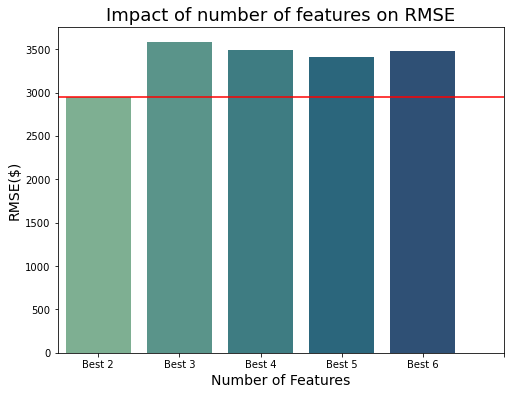

In [47]:
dict_5 = {}
for k1, v1 in k_rmse_results_5.items():
    key = k1
    for k2,v2 in v1.items():
        value = v2  
        dict_5[key] = value
plt.figure(figsize=(8,6))
for k,v in dict_5.items():
    x = list(dict_5.keys())
    y = list(dict_5.values())  
    sns.barplot(x=x,y=y, label="{}".format(k), palette='crest')

# Settings
plt.xlabel('Number of Features',fontsize=14)
plt.ylabel('RMSE($)',fontsize=14)
plt.xticks(range(6), ['Best 2', 'Best 3', 'Best 4', 'Best 5', 'Best 6'])
plt.axhline(y = min(y), color = 'r')
plt.title('Impact of number of features on RMSE',fontsize=18)

- 2 best features produces the least RMSE followed by Best 5. However, we will still look for involving more features 

Let's now optimize these models that performed the best. We will optimize for the **best value of k**

---

### Hyperparameter Optimization

For the models in the last step, lets vary the hyperparameter value from **n_neighbors 1 to 25**

In [48]:
def knn_train_test(df, train_col_names, target_col_name):
    '''
    The function encapsulates the training and 
    simple validation process for a multiple
    parameters for k.
    
    Args:
        train_col_name: Train's Column name
        target_col_name: Target Column name
        df : DataFrame
    Returns:
        RMSE of the columns
    '''
    np.random.seed(1)
    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    # Divide the dataframe into two partitions
    half = int(len(rand_df) / 2)
    
    # One for train other for test
    train_df = rand_df.iloc[0:half]
    test_df = rand_df.iloc[half:]
    
    # K values
    k = [i for i in range(1, 25)]
    k_rmse = {}
    
    for k_val in k:
        knn = KNeighborsRegressor(n_neighbors=k_val)
        # Fit a KNN model to train_df (features and target)
        knn.fit(train_df[train_col_names], train_df[target_col_name])

        # Predict 
        prediction = knn.predict(test_df[train_col_names])

        # Calculate and return RMSE
        mse = mean_squared_error(test_df[target_col_name], prediction)
        rmse = np.sqrt(mse)
        k_rmse[k_val] = rmse
    return k_rmse

In [49]:
k_rmse_results = {}
for num_of_best_features in range(2,7):
    k_rmse_results['{} number of best features'.format(num_of_best_features)] = knn_train_test(df, sorted_features[:num_of_best_features], 'price')

# Uncomment below to view full dict
# k_rmse_results     

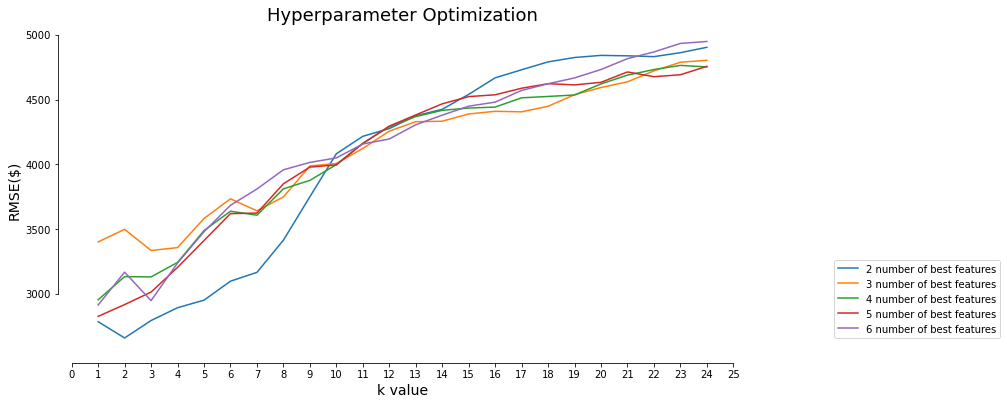

In [50]:
# Plot k values 
plt.figure(figsize=(12,6))
for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())  
    plt.plot(x,y, label="{}".format(k))

# Settings
plt.xlabel('k value',fontsize=14)
plt.ylabel('RMSE($)',fontsize=14)
plt.xticks(range(26))
plt.title('Hyperparameter Optimization',fontsize=18)
plt.legend(bbox_to_anchor = (1.4, 0.3))

# Aesthetics
sns.despine(offset=10, trim=True)

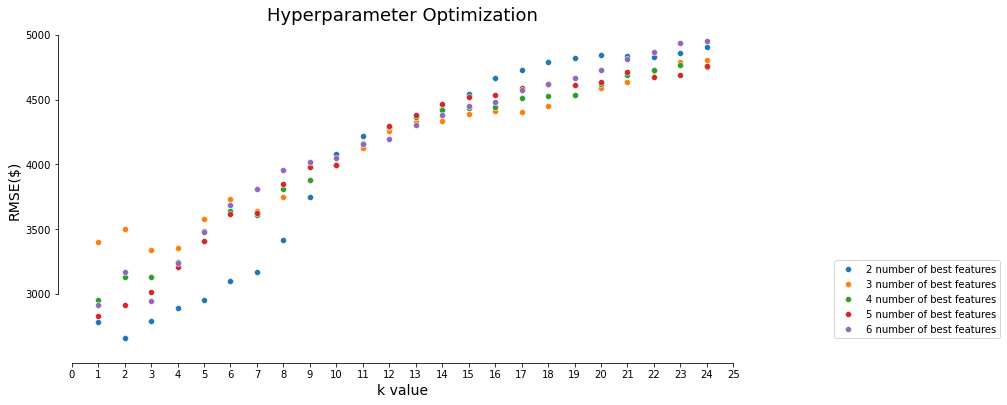

In [51]:
# Plot k values 
plt.figure(figsize=(12,6))
for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())  
    sns.scatterplot(x=x, y=y, label="{}".format(k))

# Settings
plt.xlabel('k value',fontsize=14)
plt.ylabel('RMSE($)',fontsize=14)
plt.xticks(range(26))
plt.title('Hyperparameter Optimization',fontsize=18)
plt.legend(bbox_to_anchor = (1.4, 0.3))

# Aesthetics
sns.despine(offset=10, trim=True)


The lowest RMSE's are found in the lower **n_neighbors of 2 and 3**. The singular lowest score came from using the **2 attributes n_neighbors of 2**. 

So far, we have used the 75-25 train/test validation method. Let's finish by using a different technique k-folds.

Below we are going to loop through 1-25 k folds to see which gives the lowest RMSE.

---

## Using K-fold cross-validation
Modify the knn_train_test() function to use k-fold cross validation instead of test/train validation.

In [52]:
# from sklearn.model_selection import cross_val_score, KFold

In [53]:
def knn_train_test(df, train_col_names, target_col_name, folds):
    '''
    The function encapsulates the training and 
    K_fold cross validation process for a multiple
    parameters for k.
    
    Args:
        train_col_name: Train's Column names
        target_col_name: Target Column name
        df : DataFrame
        folds: K_folds
    Returns:
        mean RMSE of the columns
    '''
    
    kf = KFold(folds, shuffle=True, random_state=1)
    model = KNeighborsRegressor(3) # k = 3
    scores_mse = cross_val_score(model, df[train_col_names], 
                                 df[target_col_name], scoring="neg_mean_squared_error",
                                 cv=kf)
    rmse = []
    scores_mse = list(scores_mse)
    for mse in scores_mse:
        mse = abs(mse)
        root_mse = mse**(1/2)
        rmse.append(root_mse)
    return rmse, np.mean(rmse)

In [54]:
list_lowest_rmse_uni = ['engine-size', 'horsepower', 'width', 'curb-weight']
k_folds = list(range(2,26))
dict_k_folds_means = {}

# Loop through number of k folds
for k in k_folds:
    rmse_k = knn_train_test(df, list_lowest_rmse_uni, 'price', k)
    dict_k_folds_means[k] = rmse_k[1]
    
# dict_k_folds_means

<font color = 'grey'> All credits for this plot goes to [Ulrich Stern](https://stackoverflow.com/users/1628638/ulrich-stern), as I edited the code he helped someone with his [answer](https://stackoverflow.com/questions/36271302/changing-color-scale-in-seaborn-bar-plot) on stackoverflow 


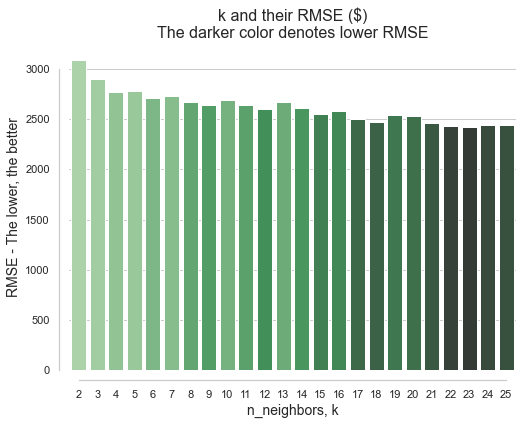

In [55]:
ser_dict_k_folds_means = pd.Series(dict_k_folds_means)
sns.set(style="whitegrid", color_codes=True)

data = ser_dict_k_folds_means   # data underlying bar plot in question

#plot
plt.figure(figsize=(8,6))
pal = sns.color_palette("Greens_d", len(data))
rank = data.argsort().argsort()   # http://stackoverflow.com/a/6266510/1628638
sns.barplot(x=data.index, y=data, palette=np.array(pal[::-1])[rank])

# Settings
plt.xlabel('n_neighbors, k', fontsize=14)
plt.ylabel('RMSE - The lower, the better', fontsize=14)
plt.title('k and their RMSE ($)\nThe darker color denotes lower RMSE', fontsize=16)

# Aesthetics
sns.despine(offset=10, trim=True)

- Higher n_neighbor values tend to result in lower RMSE values. The lowest RMSE we could achieve with k within the range of 1-25 was at k=25 that is around USD 2,419
- Large values of k defeats the basic idea behind KNN as the points that are near might have similar densities or classes.
---

### Further Investigations and Recommendations

Lets plot the Distributions of `price`

<Figure size 864x432 with 0 Axes>

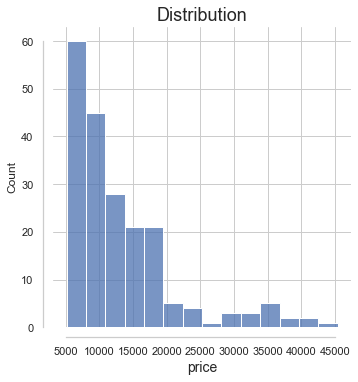

In [56]:
plt.figure(figsize=(12,6))

sns.displot(df['price'])

# Settings
plt.xlabel('price',fontsize=14)
plt.title('Distribution',fontsize=18)

# Aesthetics
sns.despine(offset=10, trim=True)

- **Clearly, the data is highly skewed.**
    - Imbalanced or skewed class distribution means that the number of data in one class is significantly different from other classes. The performance of kNN too is known to be affected by this problem. We can address this problem of an imbalance by **adding some more data for cars with higher prices**

Lets look closely to our top performing features. 

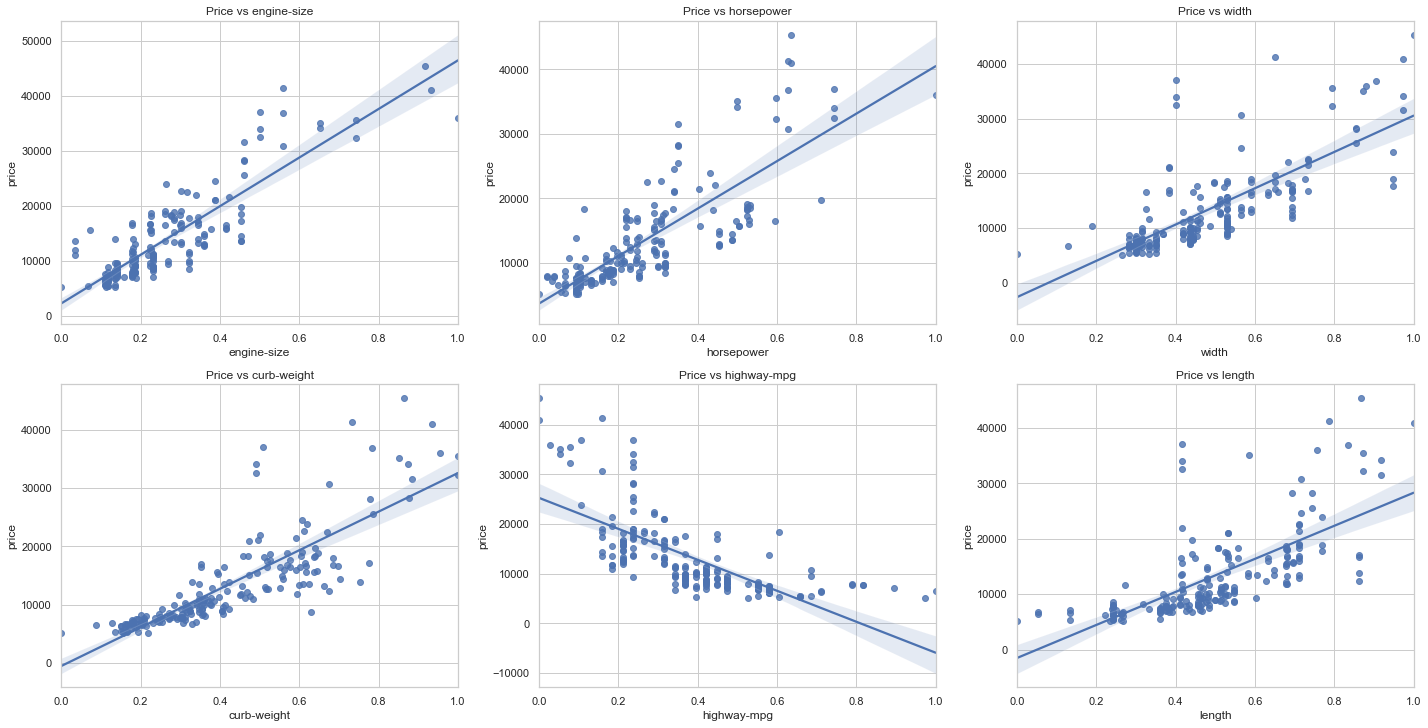

In [57]:
list_lowest_rmse_uni = ['engine-size', 'horsepower', 'width', 'curb-weight', 'highway-mpg', 'length']

plt.subplots(figsize=(20,30))
i=1     
for col in list_lowest_rmse_uni:
    plt.subplot(6,3,i)
    sns.regplot(x=col, y='price', data=df)
    plt.title('Price vs '+ col)
    i+=1
plt.tight_layout()


- There is a good relationship among all the variables with `price` 

Lets look for the correlations of all the variables

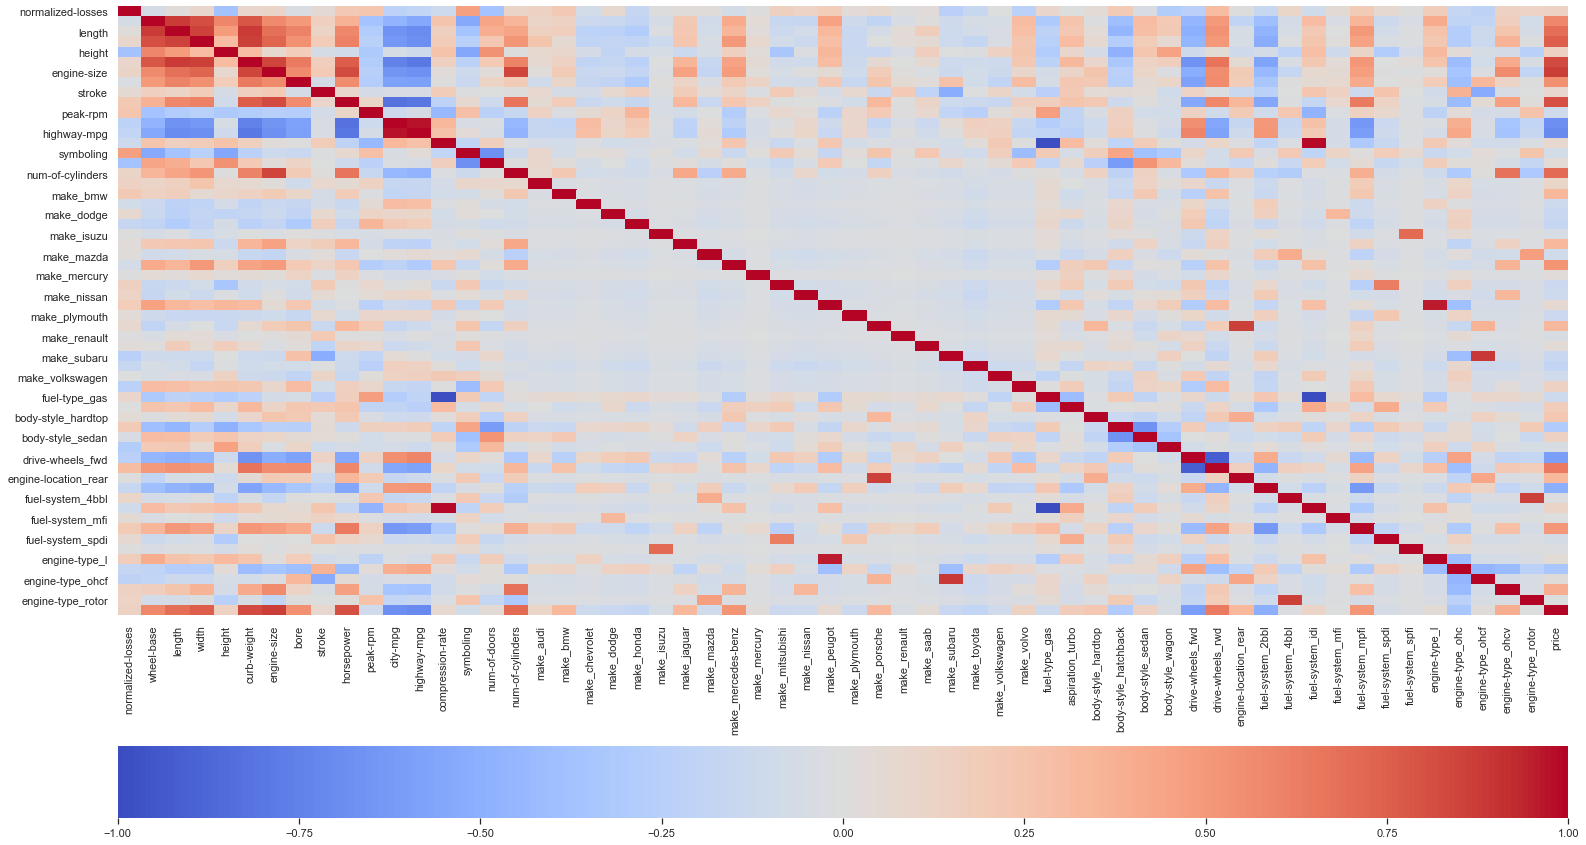

In [58]:
plt.figure(figsize=(26,16))
sns.heatmap(df.corr(), fmt='.1g', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm',cbar_kws= {'orientation': 'horizontal'})

- Features such as `bore`, `lenght` and `wheel-base` also have significant correlation with `price` 
- A lot of features cause Multi-Colinearity.

### Recommendations:
- Balancing the Dataset by adding more high price cars data
- Trying with other attributes
- Using different model than KNN Regressor